/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

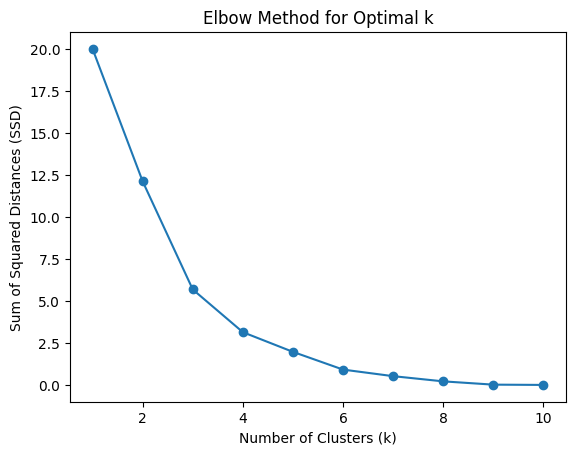

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

data = {
    'Product ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Price': [500, 1000, 600, 300, 100, 50, 200, 100, 450, 250],
    'Sales': [100, 50, 75, 25, 100, 200, 75, 50, 150, 75]
}

df = pd.DataFrame(data)

X = df[['Price', 'Sales']]

scaler = StandardScaler()
kmeans = KMeans()

pipeline = make_pipeline(scaler, kmeans)

ssd = []
for k in range(1, 11):
    pipeline.set_params(kmeans__n_clusters=k)
    pipeline.fit(X)
    ssd.append(pipeline.named_steps['kmeans'].inertia_)

plt.plot(range(1, 11), ssd, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


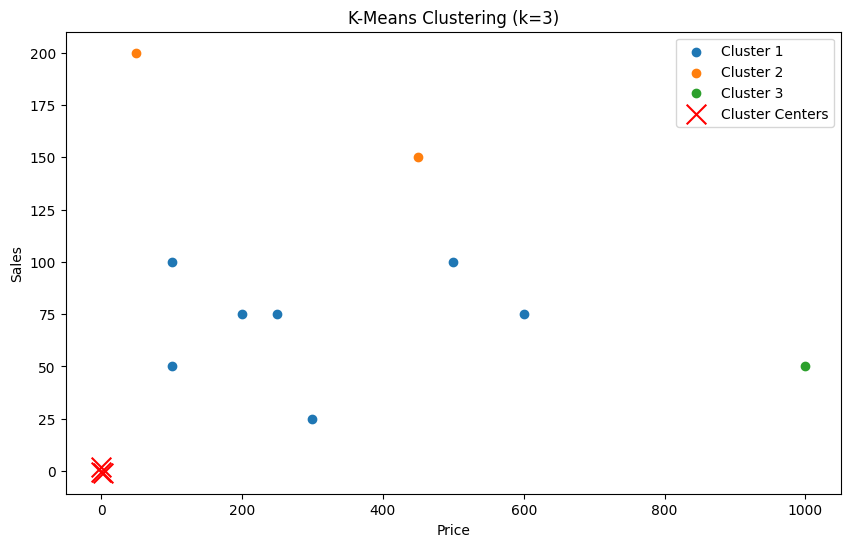

In [2]:
chosen_k = 3

pipeline.set_params(kmeans__n_clusters=chosen_k)
pipeline.fit(X)

df['Cluster'] = pipeline.named_steps['kmeans'].labels_

plt.figure(figsize=(10, 6))

for i in range(chosen_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Price'], cluster_data['Sales'], label=f'Cluster {i + 1}')

plt.scatter(
    pipeline.named_steps['kmeans'].cluster_centers_[:, 0],
    pipeline.named_steps['kmeans'].cluster_centers_[:, 1],
    marker='x',
    s=200,
    c='red',
    label='Cluster Centers'
)

plt.title(f'K-Means Clustering (k={chosen_k})')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [3]:
import numpy as np
from sklearn import metrics

true_labels = np.array([0, 2, 0, 1, 1, 1, 0, 1, 0, 0])

predicted_labels = pipeline.named_steps['kmeans'].labels_

accuracy = metrics.accuracy_score(true_labels, predicted_labels)

homogeneity = metrics.homogeneity_score(true_labels, predicted_labels)

v_measure = metrics.v_measure_score(true_labels, predicted_labels)

adjusted_rand = metrics.adjusted_rand_score(true_labels, predicted_labels)

print(f"Accuracy: {accuracy:.4f}")
print(f"Homogeneity Score: {homogeneity:.4f}")
print(f"V Measure Score: {v_measure:.4f}")
print(f"Adjusted Rand Score: {adjusted_rand:.4f}")

Accuracy: 0.6000
Homogeneity Score: 0.3463
V Measure Score: 0.3744
Adjusted Rand Score: 0.1054


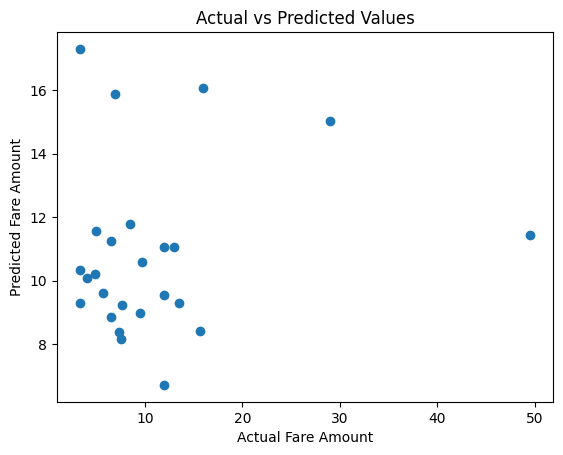

Root Mean Squared Error (RMSE): 9.56
R-squared Value: 0.0070


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("cab_details.csv")

X = df.drop("fare_amount", axis=1)
y = df["fare_amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.show()

rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Value: {r_squared:.4f}")